Let’s assume that you are running a real-estate business in Boston and want to predict house prices for Bostonians. You might be spending your first few weeks in Boston but you will be proud of your first contribution to the city after completing this exercise!

You are given a dataset (let’s call it Boston Housing Prices-BHP) that contains 506 rows and 14 columns (the dataset is available on Canvas). Each of the 506 rows in the BHP dataset describes a Boston suburb or town. The description of each column is provided below.

 

The median value of owner-occupied homes in $1000s.

 

Before starting your analysis, you should get to know your data. In this assignment, you are expected to do the following using descriptive statistics tools:

- Describe the problem and identify the important variables that may play an essential role in the analysis. Please explain why.
- Calculate the measure of location and measure of dispersion.
- Check if there is any skewness in any of those variables. (Note that a positive skewness occurs when mean is greater than median, and a negative skewness occurs when mean is less than median.)
- Check if there is any outliers and/or extreme outliers in the dataset.

Columns:

CRIM - Per capita crime rate by town.

ZN - Proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - Proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise).

NOX - Nitric oxides concentration (parts per 10 million) [parts/10M].

RM - Average number of rooms per dwelling.

AGE - Proportion of owner-occupied units built prior to 1940.

DIS - Weighted distances to five Boston employment centers.

RAD - Index of accessibility to radial highways.

TAX - Full-value property-tax rate per  10,000[
 /10k].

PTRATIO - Pupil-teacher ratio by town.

B - Result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSTAT - Percentage of lower status of the population.

MEDV - Median value of owner-occupied homes in  1000′s[k
 ].

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
boston = pd.read_csv('Statistical Analysis Homework Dataset.csv')
boston.info() #There seem to be non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
### Measures of Location and Dispersion ###

#Mean, count, quartiles, std mix and max
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#InterQuantile Range
Q3 = boston.quantile(0.75)
Q1 = boston.quantile(0.25)
IQR = Q3-Q1
IQR.to_frame().rename({0:"IQR"},axis=1)

,IQR
CRIM,3.595038
ZN,12.500000
INDUS,12.910000
CHAS,0.000000
NOX,0.175000
RM,0.738000
AGE,49.050000
DIS,3.088250
RAD,20.000000
TAX,387.000000


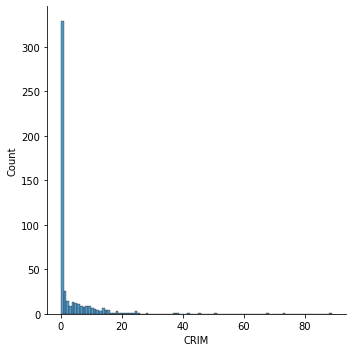

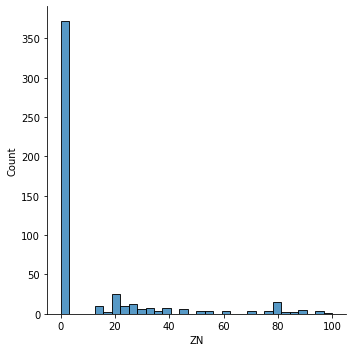

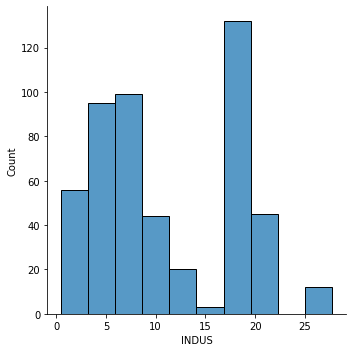

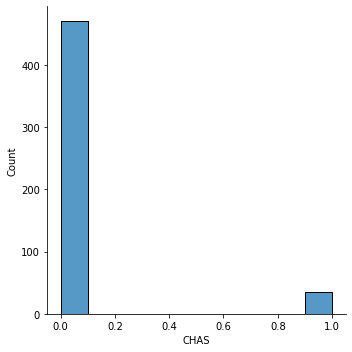

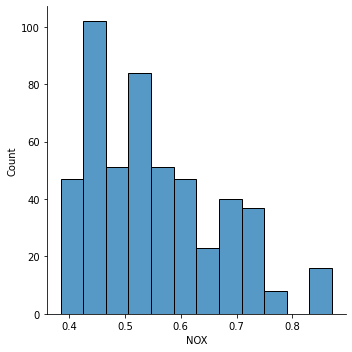

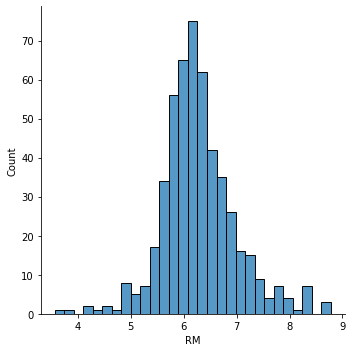

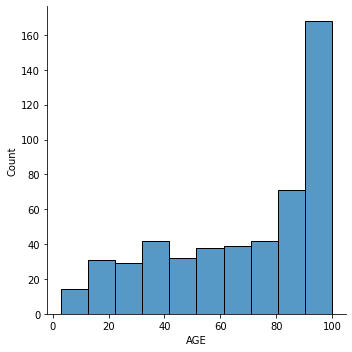

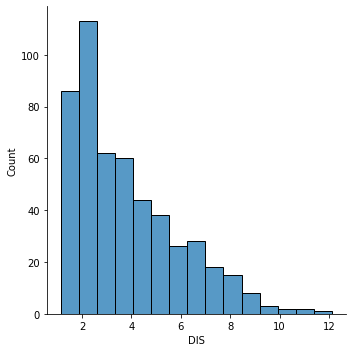

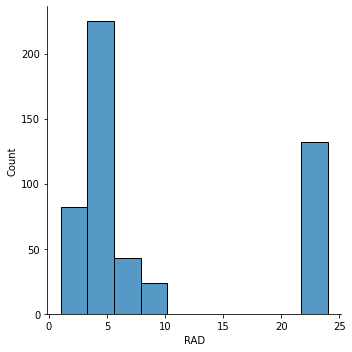

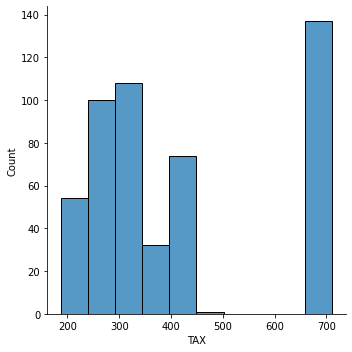

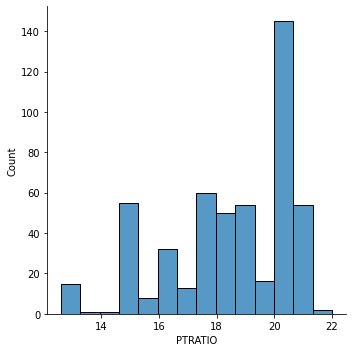

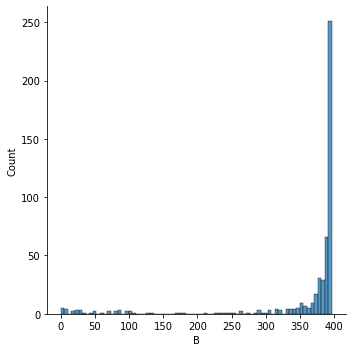

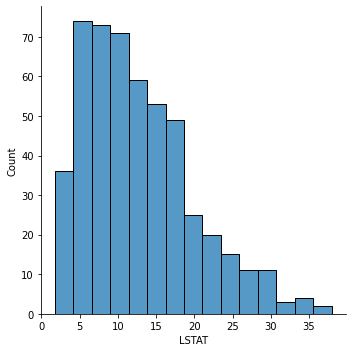

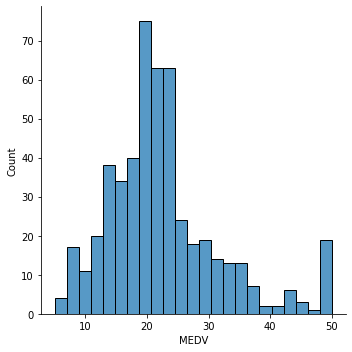

In [8]:
#Histogram of all Variables

%matplotlib inline
import matplotlib.pyplot as plt

for col in boston.columns:
  sns.displot(boston[col])
  
plt.show()


CRIM


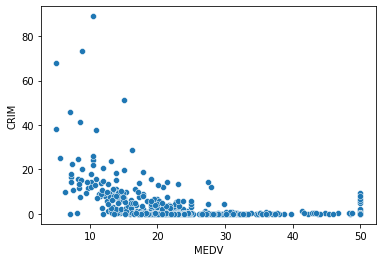

ZN


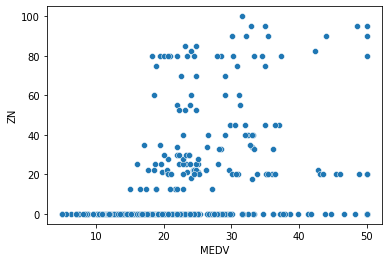

INDUS


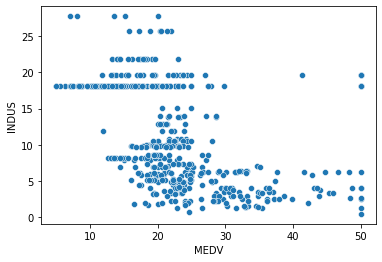

CHAS


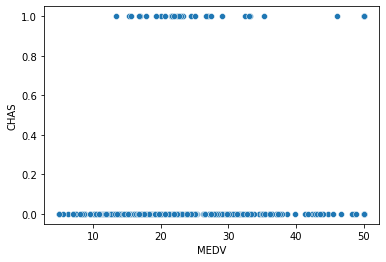

NOX


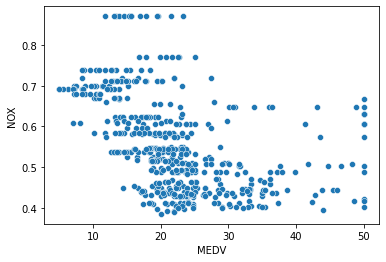

RM


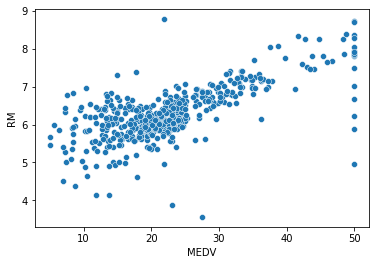

AGE


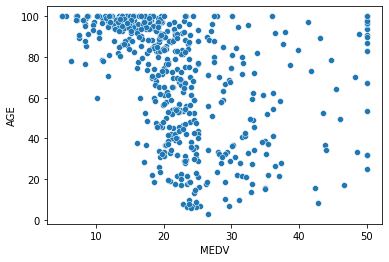

DIS


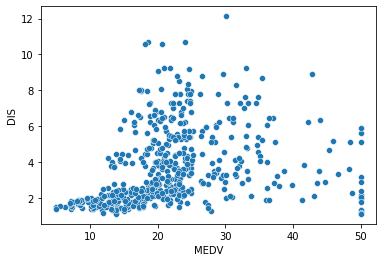

RAD


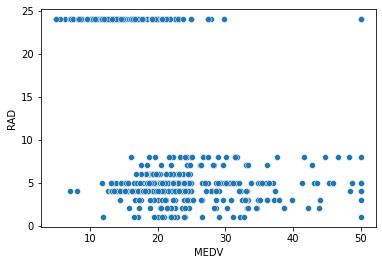

TAX


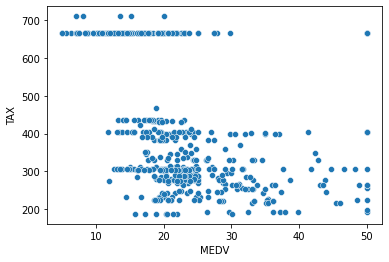

PTRATIO


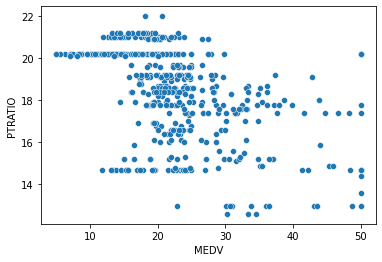

B


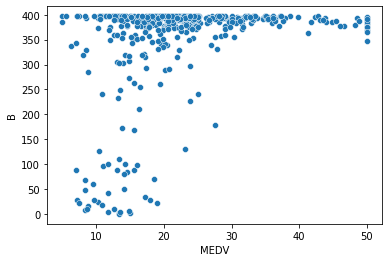

LSTAT


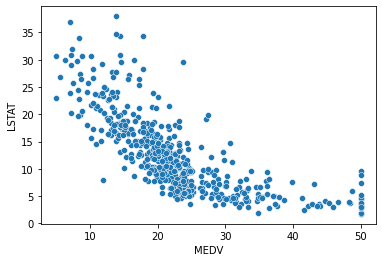

In [62]:
%matplotlib inline
columns = list(boston.columns)

for col in columns[:13]:
  print(col)
  sns.scatterplot(data=boston, y=col, x="MEDV")
  plt.show()

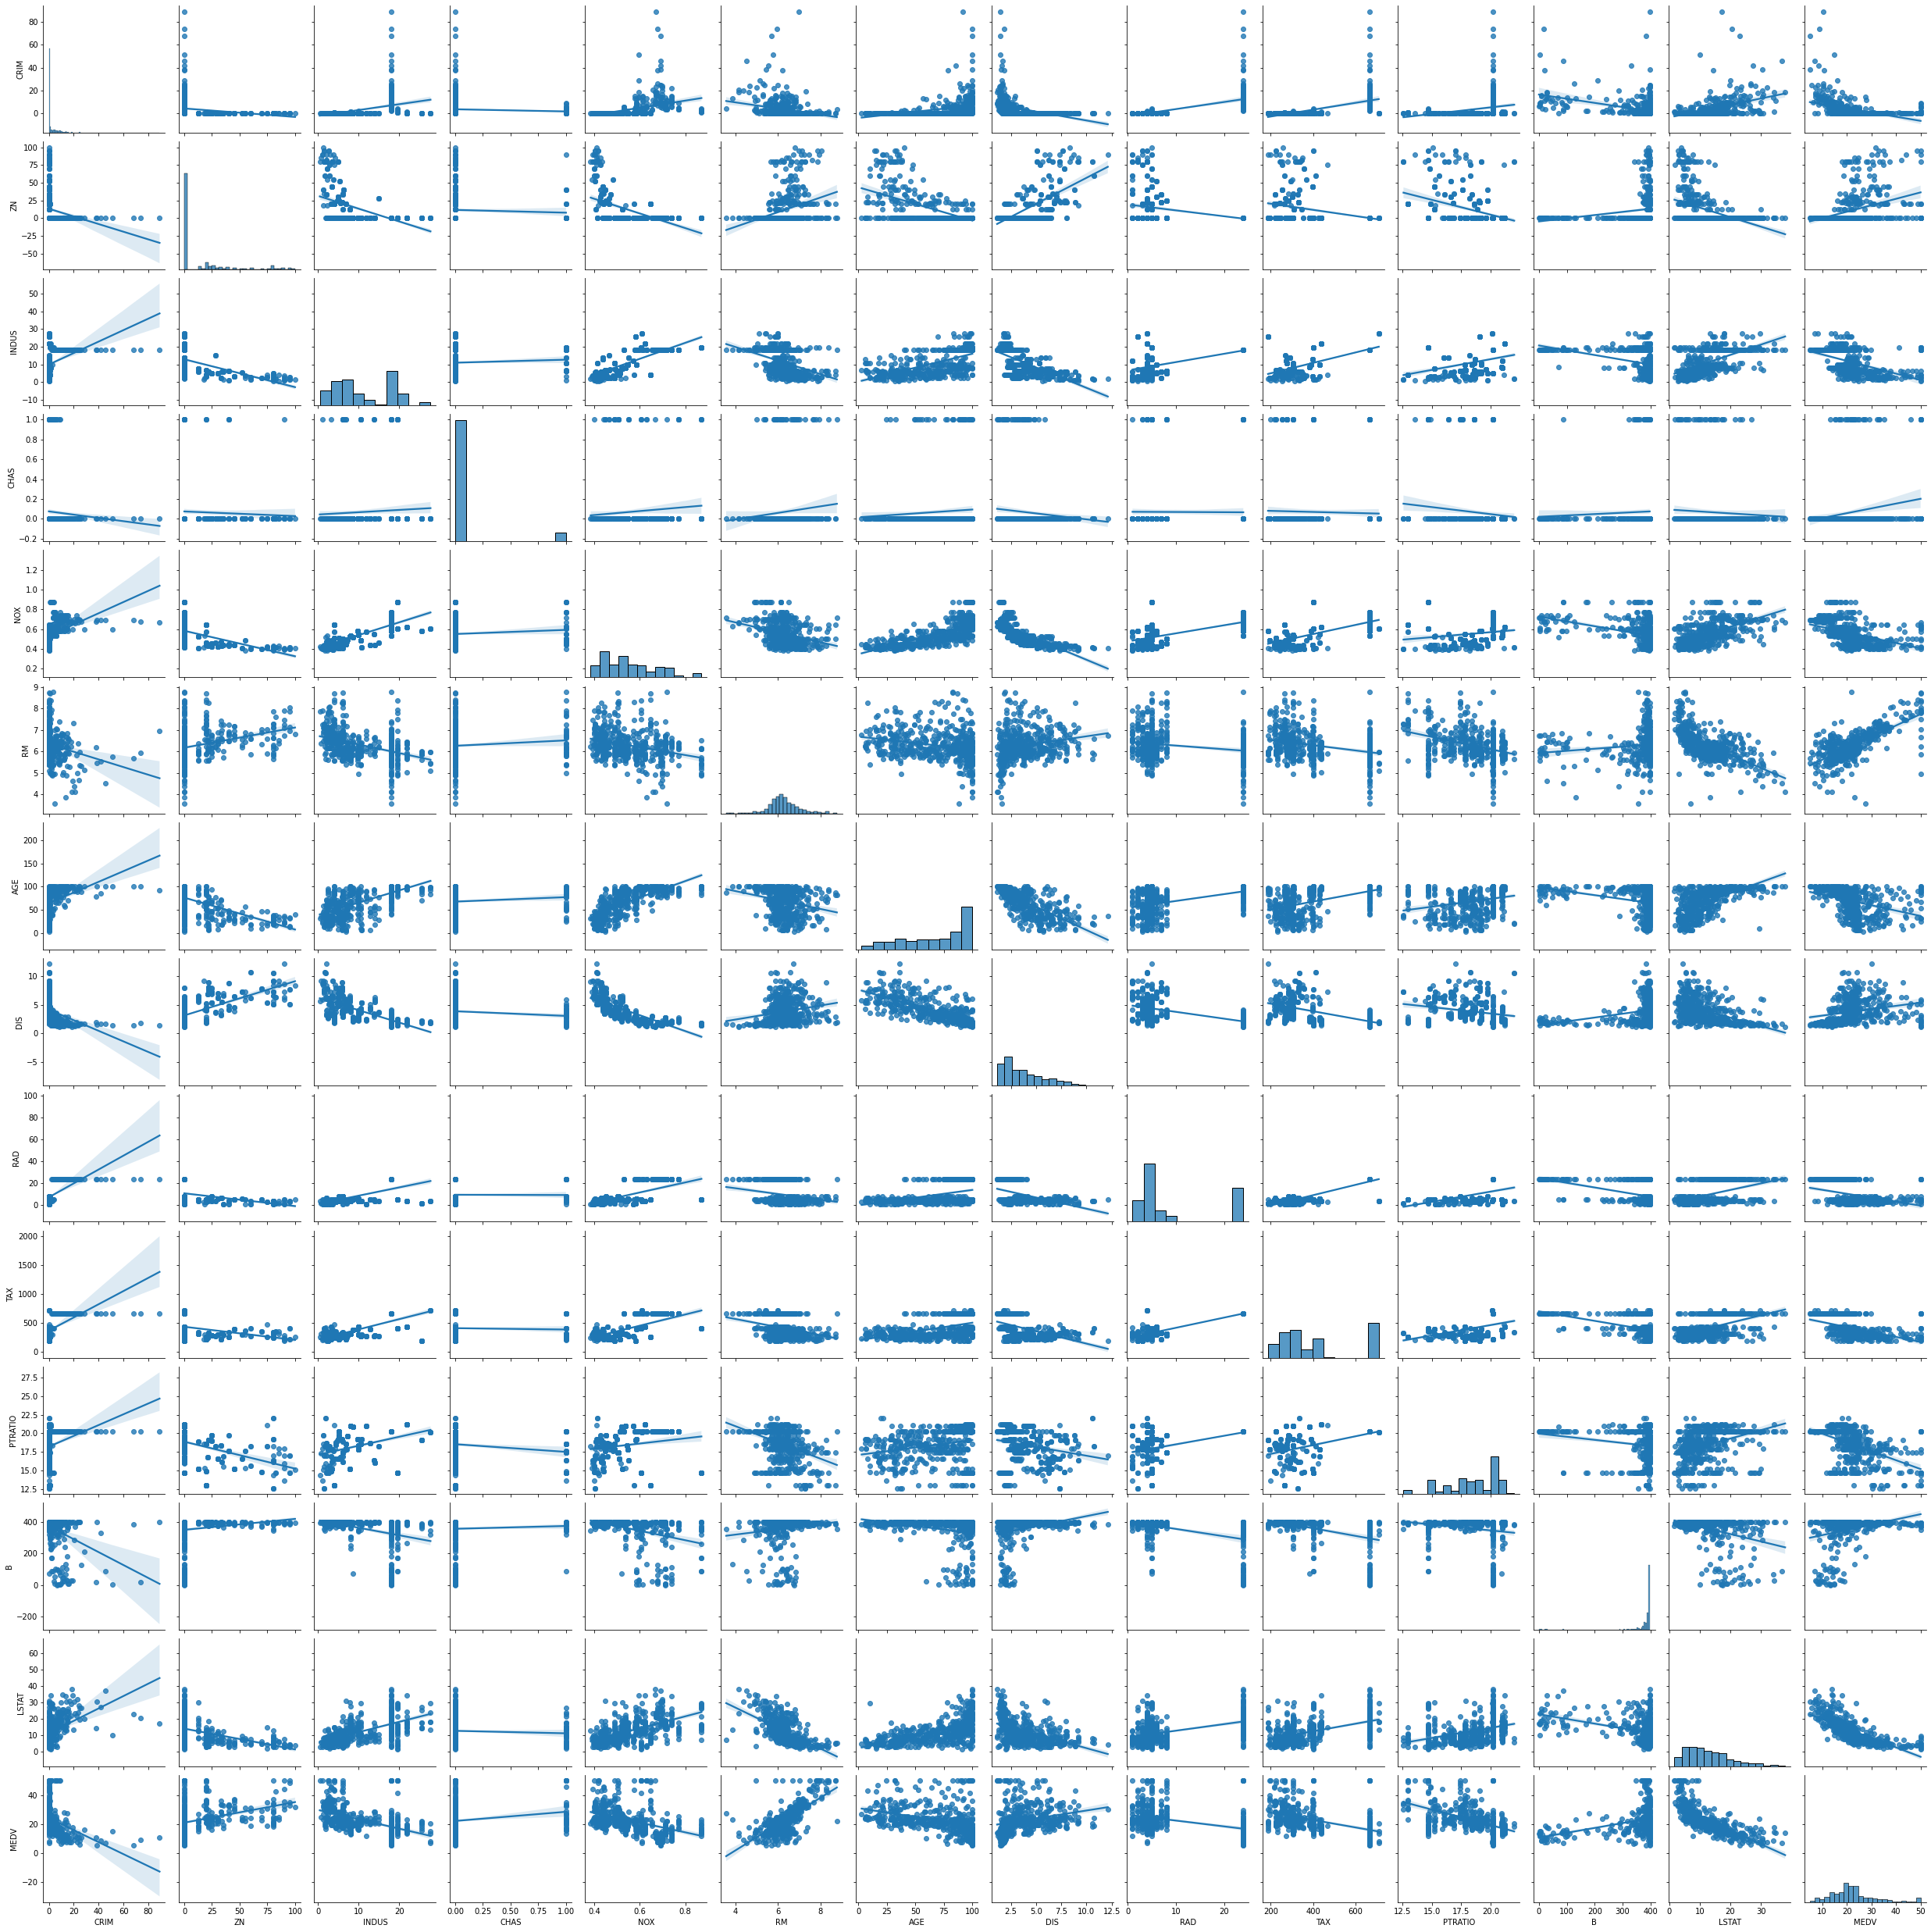

In [66]:
# Looking at it all together
%matplotlib inline
sns.pairplot(boston, kind="reg")
plt.show()

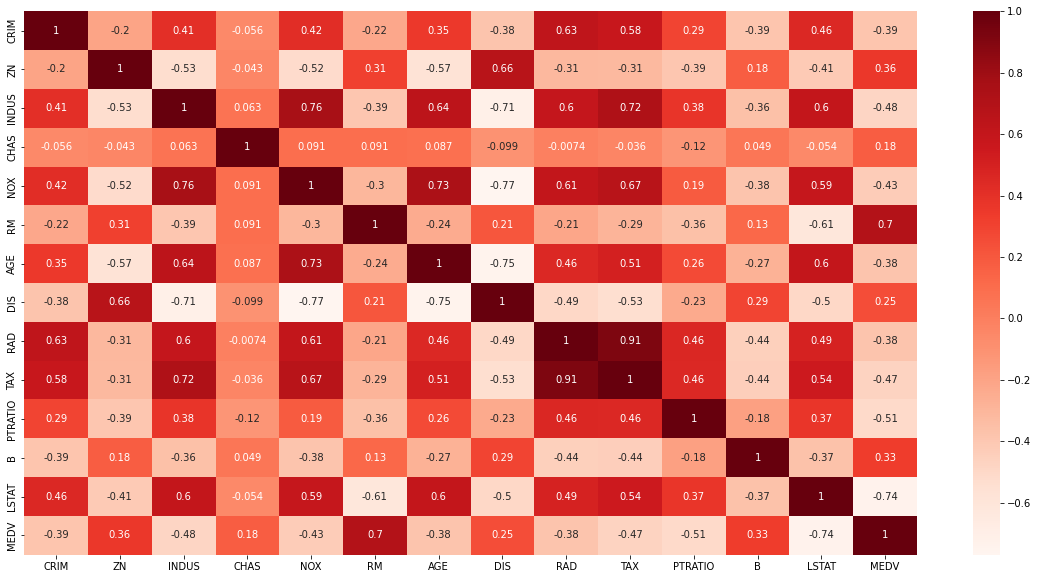

In [69]:
#Correlation
plt.figure(figsize=(20,10))
cor = boston.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

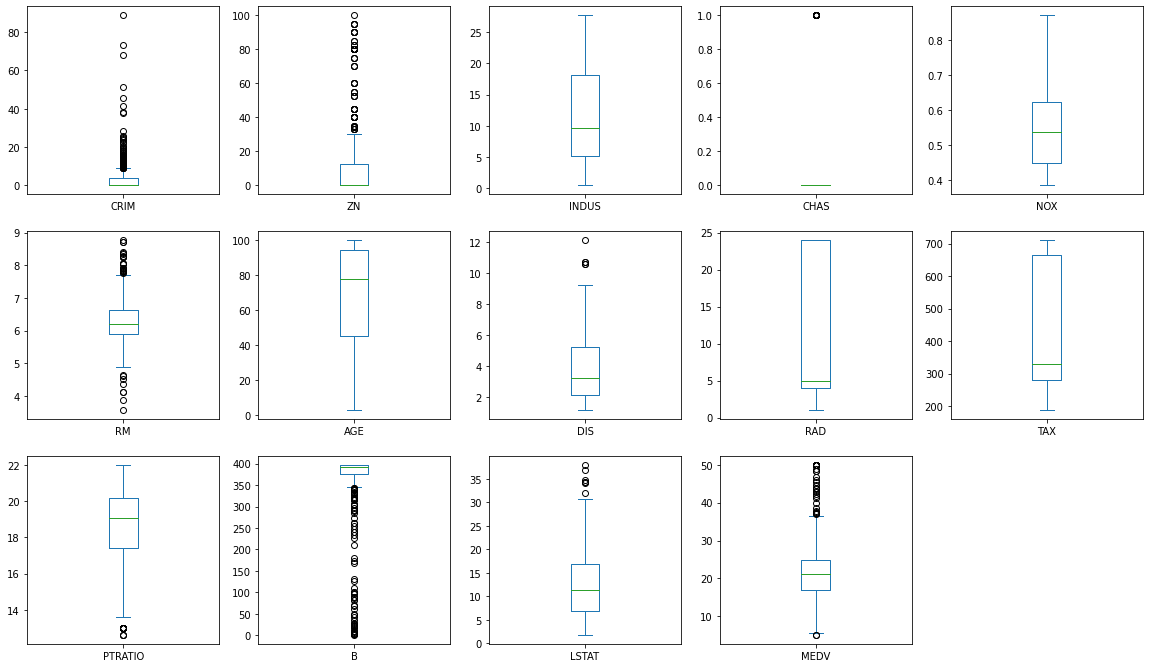

In [71]:
# Outlier Detection
boston.plot(kind='box', layout=(5,5), subplots=True, sharex=False, sharey=False, figsize=(20,20))
plt.show()

In [74]:
# Outlier Identification

outliers = pd.DataFrame(boston[((boston< (Q1 - 1.5 * IQR)) |(boston> (Q3 + 1.5 * IQR))).any(axis=1)])
len(outliers)

238

In [ ]:
boston[((boston< (Q1 - 1.5 * IQR)) |(boston> (Q3 + 1.5 * IQR))).any(axis=1)]

In [70]:
#- Describe the problem and identify the important variables that may play an essential role in the analysis. Please explain why.

In [8]:

from pandas_profiling import ProfileReport

#report = ProfileReport(boston)
#report
